# SSH model

We will show the density distribution of the ground state of a chain in the 1D SSH model. The Hamiltonian is $H=v\sum_{k=1}^{N/2}(a^\dagger_{2k-1}a_{2k}+h.c.)+w\sum_{k=1}^{N/2}(a^\dagger_{2k}a_{2k+1}+h.c.)$.
We can write this Hamiltonian in its matricial form as $H = \vec{a}^\dagger\mathcal{H}\vec{a}$ with $\vec{a} = (a_1, a_2,...,a_N)^T$. Therefore, we can find the eigenmodes by diagonalizing $\mathcal{H}$. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from IPython.display import Video
import os
import io

In [8]:
def SSHham(v,w,Nsites, BC = "OBC"):
    Ham = np.zeros((Nsites,Nsites))
    for site in range(Nsites):
        if site == Nsites-1:
            if BC == "PBC":
                if site % 2 == 0:
                    Ham[Nsites-1,0] = v
                else:
                    Ham[Nsites-1,0] = w
            else:
                continue
        else:
            if site % 2 == 0:
                Ham[site,site+1] = v
            else:
                Ham[site,site+1] = w
    
    Ham = Ham + Ham.conj().T
    return Ham

def get_eigenmodes(Ham):
    ews, evs = np.linalg.eig(Ham)
    sort_order = np.argsort(ews)
    ews = ews[sort_order]
    evs = evs[:,sort_order]
    return evs

def get_exp_n(site,occupied_emodes):
    n_emodes = occupied_emodes.shape[1]
    exp_val = 0
    for i in range(n_emodes):
        exp_val += occupied_emodes[site,i].conj()*occupied_emodes[site,i]
    return exp_val


In [13]:
def get_local_dens(v, w, num_sites, BC = "OBC"):
    H = SSHham(v, w, num_sites,BC=BC)
    evs = get_eigenmodes(H)

    emodes = evs[:,:int(num_sites/2)-1]

    exp = np.zeros(num_sites)
    for site in range(num_sites):
        exp[site] = get_exp_n(site,emodes)
    
    return exp
    

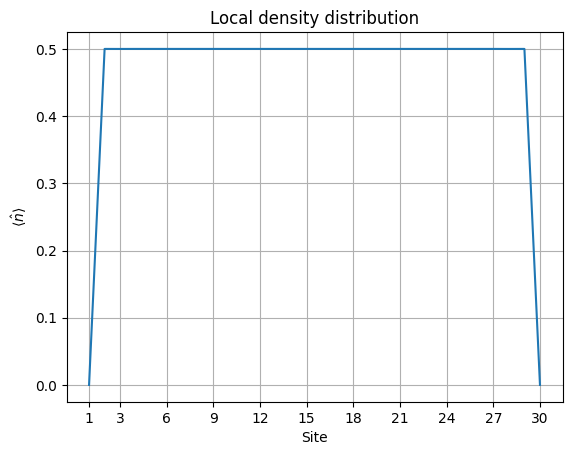

In [10]:
v = 1
w = 100
num_sites = 30

exp = get_local_dens(v, w, num_sites)
plt.plot(list(range(1,num_sites+1)),exp)
plt.title('Local density distribution')
plt.xlabel('Site')
plt.ylabel(r"$\langle \hat{n} \rangle$")
plt.xticks([1, *list(range(int(num_sites/10), num_sites+1, int(num_sites/10)))])
plt.grid()
plt.show()

In [11]:
num_sites = 30
output_dir = os.path.join(os.getcwd(), f"{num_sites}_sites")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    
x_ax = list(range(1,num_sites+1))

v = 100
w_vals = [1, 10, 20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500, 1000, 10000]
images = []

for w in w_vals:
    exp = get_local_dens(v, w, num_sites)
    fig, ax = plt.subplots()
    ax.plot(list(range(1,num_sites+1)),exp, label=r"$v/w = {:.2f}$".format(float(v/w)))
    ax.set_title('Local density distribution')
    ax.set_xlabel('Site')
    ax.set_ylabel(r"$\langle \hat{n} \rangle$")
    ax.set_ylim([-0.05, 0.75])
    ax.set_xticks([1, *list(range(int(num_sites/10), num_sites+1, int(num_sites/10)))])
    ax.legend()
    ax.grid()
    
    file_name = os.path.join(output_dir, f'plot_w_{w}.png')
    plt.savefig(file_name)
    plt.close(fig)
    # images.append(fig)
    images.append(imageio.imread(file_name))
    
output_video = 'v_w_dependency.mp4'
imageio.mimsave(output_video, images, fps=5)
Video(output_video)


In [16]:
num_sites = 30
output_dir = os.path.join(os.getcwd(), f"{num_sites}_sites")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    
x_ax = list(range(1,num_sites+1))

v = 100

# Part 1: Log-spaced from 1 to 100, with denser points near 100
n = 100  # Number of points
log_part1 = np.logspace(0, 2, n)  # logspace from 10^0 (1) to 10^2 (100)
log_part1 = np.sort(100 - (100 - log_part1))  # Flip to make it denser near 100

log_part2 = np.logspace(2, 4, n)  # logspace from 10^2 (100) to 10^4 (10,000)
log_part2 = np.sort(100 + (log_part2 - 100))  # Shift to make it denser near 100

# Merge the two parts and remove duplicate 100
w_vals = np.unique(np.concatenate((log_part1, log_part2)))
images = []

for w in w_vals:
    exp = get_local_dens(v, w, num_sites,BC="OBC")
    fig, ax = plt.subplots()
    ax.bar(list(range(1,num_sites+1)),exp, width= 1,label=r"$v/w = {:.2f}$".format(float(v/w)))
    ax.set_title('Local density distribution')
    ax.set_xlabel('Site')
    ax.set_ylabel(r"$\langle \hat{n} \rangle$")
    ax.set_ylim([-0.00, 0.6])
    ax.set_xticks([1, *list(range(int(num_sites/10), num_sites+1, int(num_sites/10)))])
    ax.legend()
    ax.grid()
    
    # Save the figure to a BytesIO object
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    plt.close(fig)
    
    # Convert buffer to numpy array and append to images list
    buf.seek(0)
    img_array = imageio.imread(buf, format='png')
    images.append(img_array)

output_video = 'v_w_dependency_bars.mp4'
imageio.mimsave(output_video, images, fps=10)
Video(output_video)


In [37]:
# Part 1: Log-spaced from 1 to 100, with denser points near 100
n1 = 5  # Number of points
log_part1 = np.logspace(0, 2, n1)  # logspace from 10^0 (1) to 10^2 (100)
log_part1 = np.sort(100 - (100 - log_part1))  # Flip to make it denser near 100

# Part 2: Log-spaced from 100 to 10,000, denser near 100
n2 = 5  # Number of points
log_part2 = np.logspace(2, 4, n2)  # logspace from 10^2 (100) to 10^4 (10,000)
log_part2 = np.sort(100 + (log_part2 - 100))  # Shift to make it denser near 100

# Merge the two parts and remove duplicate 100
final_list = np.unique(np.concatenate((log_part1, log_part2)))

print(final_list)

[1.00000000e+00 3.16227766e+00 1.00000000e+01 3.16227766e+01
 1.00000000e+02 3.16227766e+02 1.00000000e+03 3.16227766e+03
 1.00000000e+04]


In [15]:
print(SSHham(1,2,8,"PBC"))

[[0. 1. 0. 0. 0. 0. 0. 2.]
 [1. 0. 2. 0. 0. 0. 0. 0.]
 [0. 2. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 2. 0. 0. 0.]
 [0. 0. 0. 2. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 2. 0.]
 [0. 0. 0. 0. 0. 2. 0. 1.]
 [2. 0. 0. 0. 0. 0. 1. 0.]]
